In [18]:
import os
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#for visualization
import matplotlib.pyplot as plt

In [19]:
os.getcwd()

'D:\\EASTC(2nd Year)\\ML\\Project_work'

In [20]:
os.chdir("D:\\EASTC(2nd Year)\\ML\\Project_work")

In [21]:
bee_data = pd.read_csv("bee_dataset.csv")
print(bee_data)

     rainfall_mm  avg_temperature   humidity  num_hives    hive_type  \
0     859.605698        28.852355  83.993554         40       modern   
1     783.408284        30.818833  79.246337         28  traditional   
2     877.722625        24.202865  70.596304         58  traditional   
3     982.763583        28.125938  63.530632         55  traditional   
4     771.901595        25.698715  76.982233         28       modern   
..           ...              ...        ...        ...          ...   
495   864.669205        26.437799  90.060929         38  traditional   
496   675.530461        30.595373  90.615036         31       modern   
497   777.159359        28.281686  82.083662         49  traditional   
498   694.925810        25.857642  80.240625         30  traditional   
499   634.064032        28.145166  75.925269         47  traditional   

    colony_strength disease_status  experience_years  inspection_frequency  \
0            medium            yes                11     

In [22]:
bee_data.head(10)

,rainfall_mm,avg_temperature,humidity,num_hives,hive_type,colony_strength,disease_status,experience_years,inspection_frequency,honey_yield_kg
0,859.605698,28.852355,83.993554,40,modern,medium,yes,11,1,2802.221569
1,783.408284,30.818833,79.246337,28,traditional,medium,no,15,1,2554.859644
2,877.722625,24.202865,70.596304,58,traditional,weak,yes,16,9,3382.549193
3,982.763583,28.125938,63.530632,55,traditional,medium,no,17,6,3568.241945
4,771.901595,25.698715,76.982233,28,modern,strong,no,2,5,2522.913516
5,771.903565,26.025749,73.934854,31,traditional,strong,yes,18,1,2542.117983
6,989.505538,25.815212,78.951932,33,traditional,medium,no,12,6,2940.968844
7,892.092167,25.272018,76.351718,54,modern,medium,no,19,6,3654.206021
8,743.663074,27.097043,80.495527,21,modern,medium,no,18,3,2708.018479
9,865.107205,25.338100,64.647648,39,modern,medium,no,17,8,2949.783244


In [25]:
#--
X = bee_data.drop("honey_yield_kg", axis=1)
y = bee_data["honey_yield_kg"]

numeric_features = [
    "rainfall_mm", "avg_temperature", "humidity",
    "num_hives", "experience_years", "inspection_frequency"
]

nominal_features = ["hive_type", "disease_status"]
ordinal_features = ["colony_strength"]

ordinal_order = [["weak", "medium", "strong"]]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("nom", OneHotEncoder(drop="first"), nominal_features),
        ("ord", OrdinalEncoder(categories=ordinal_order), ordinal_features)
    ]
)

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
 # Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    
    # Train
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
   # from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "R2": r2}

# Convert results to DataFrame for better display
results_df = pd.DataFrame(results).T
print("Model Comparison:")
print(results_df)

joblib.dump(pipeline, "honey_model.pkl")
print("Model saved successfully!")


Model Comparison:
                          MAE           MSE        R2
Linear Regression   76.090197   8960.736479  0.962343
Decision Tree      174.801558  47095.464269  0.802082
Model saved successfully!


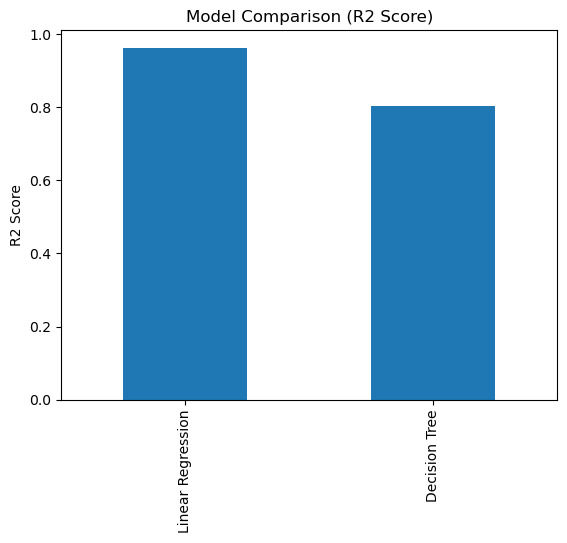

In [24]:
#import matplotlib.pyplot as plt
results_df["R2"].plot(kind="bar", title="Model Comparison (R2 Score)")
plt.ylabel("R2 Score")
plt.show()